<a href="https://colab.research.google.com/github/saurabhmishra1806/Projects-/blob/master/Bird_Migration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### One fascinating research uses GPS to track movements, flight patters of animals. 

### Here i work on manipulating, examining and visualizing GPS used to tracking birds in this way. The data from this case study comes from **LifeWatchINBO** project. We used data of three gulls named Eric, Nico and Sanne.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from google.colab import files
uploaded = files.upload()


In [2]:
birddata = pd.read_csv("bird_tracking.csv")
birddata.head()

,Unnamed: 0,altitude,date_time,device_info_serial,direction,latitude,longitude,speed_2d,bird_name
0,0,71,2013-08-15 00:18:08+00,851,-150.469753,49.419860,2.120733,0.150000,Eric
1,1,68,2013-08-15 00:48:07+00,851,-136.151141,49.419880,2.120746,2.438360,Eric
2,2,68,2013-08-15 01:17:58+00,851,160.797477,49.420310,2.120885,0.596657,Eric
3,3,73,2013-08-15 01:47:51+00,851,32.769360,49.420359,2.120859,0.310161,Eric
4,4,69,2013-08-15 02:17:42+00,851,45.191230,49.420331,2.120887,0.193132,Eric


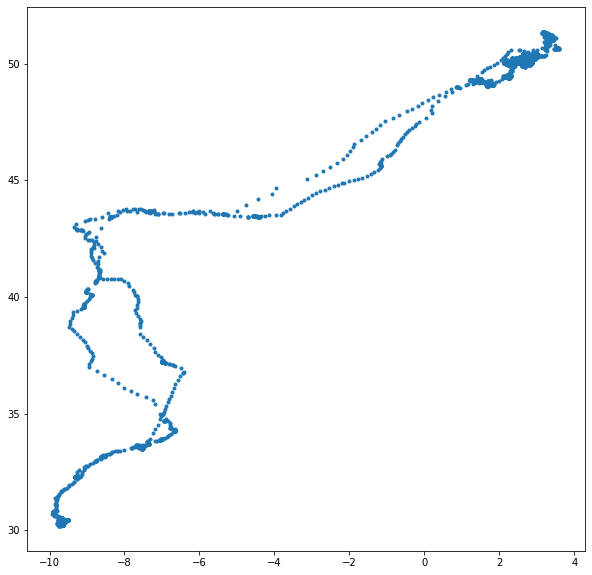

In [3]:
ix = birddata["bird_name"]=="Eric"
x, y = birddata.longitude[ix], birddata.latitude[ix]
plt.figure(figsize=(10,10))
plt.plot(x, y, ".")

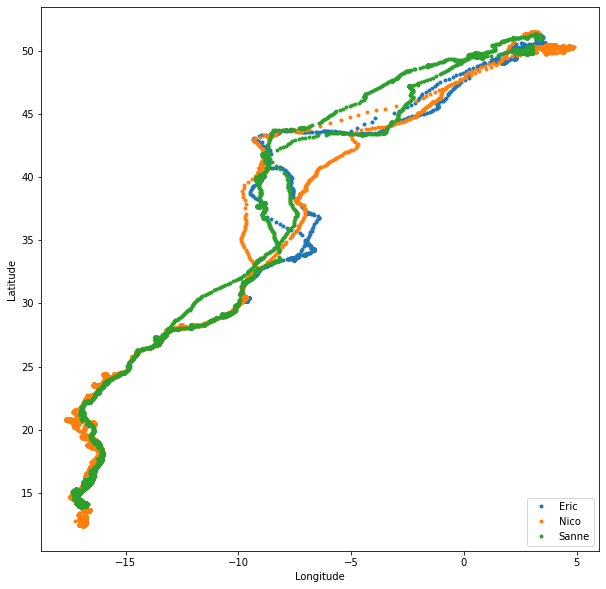

In [4]:
plt.figure(figsize=(10,10))
bird_names = pd.unique(birddata.bird_name)
for bird_name in bird_names:
  ix = birddata.bird_name == bird_name
  plt.plot(birddata.longitude[ix], birddata.latitude[ix], ".", label=bird_name)

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(loc="lower right")

In [5]:
np.isnan(birddata.speed_2d[birddata.bird_name=="Eric"]).any()

True

In [6]:
np.sum(np.isnan(birddata.speed_2d[birddata.bird_name=="Eric"]))

85

Text(0, 0.5, 'Frequency')

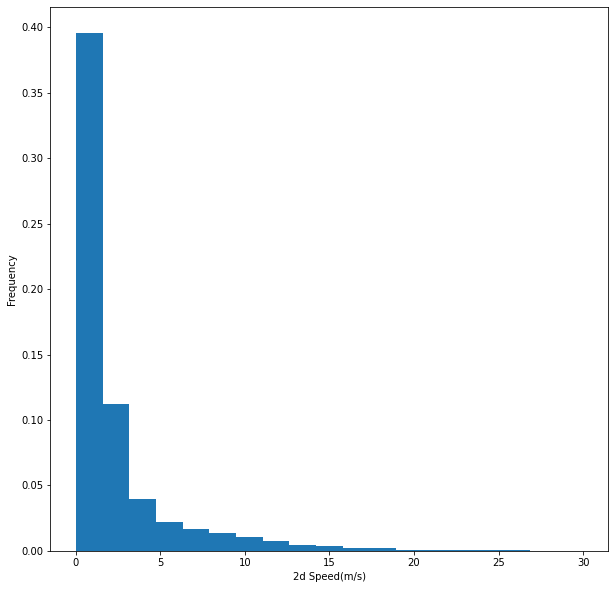

In [7]:
plt.figure(figsize=(10,10))
speed = birddata.speed_2d[birddata.bird_name=="Eric"]
ind = np.isnan(speed)
plt.hist(speed[~ind], bins=np.linspace(0,30,20), density=True)
plt.xlabel("2d Speed(m/s)")
plt.ylabel("Frequency")

In [8]:
import datetime
timestamps = []
for i in range(len(birddata)):
  timestamps.append(datetime.datetime.strptime(birddata.date_time.iloc[i][:-3], "%Y-%m-%d %H:%M:%S"))

birddata["timestamp"] = pd.Series(timestamps, index=birddata.index)
birddata.head()

,Unnamed: 0,altitude,date_time,device_info_serial,direction,latitude,longitude,speed_2d,bird_name,timestamp
0,0,71,2013-08-15 00:18:08+00,851,-150.469753,49.419860,2.120733,0.150000,Eric,2013-08-15 00:18:08
1,1,68,2013-08-15 00:48:07+00,851,-136.151141,49.419880,2.120746,2.438360,Eric,2013-08-15 00:48:07
2,2,68,2013-08-15 01:17:58+00,851,160.797477,49.420310,2.120885,0.596657,Eric,2013-08-15 01:17:58
3,3,73,2013-08-15 01:47:51+00,851,32.769360,49.420359,2.120859,0.310161,Eric,2013-08-15 01:47:51
4,4,69,2013-08-15 02:17:42+00,851,45.191230,49.420331,2.120887,0.193132,Eric,2013-08-15 02:17:42


In [9]:
times = birddata.timestamp[birddata.bird_name=="Eric"].iloc[0]
elapsed_time = [time - times for time in birddata.timestamp[birddata.bird_name=="Eric"]]
len(elapsed_time)

19795

In [10]:
times = birddata.timestamp.iloc[0]
elapsed_time = [time - times for time in birddata.timestamp]
len(elapsed_time)

61920

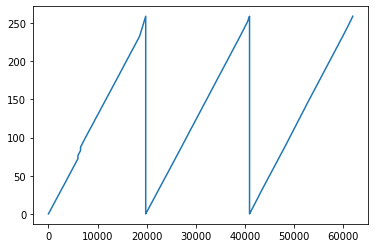

In [11]:
plt.plot(np.array(elapsed_time)/datetime.timedelta(days=1))

[0.0 0.02082175925925926 0.04155092592592593 ... 258.94564814814817
 258.9663773148148 258.9871064814815]


Text(0, 0.5, 'Daily Mean Speed')

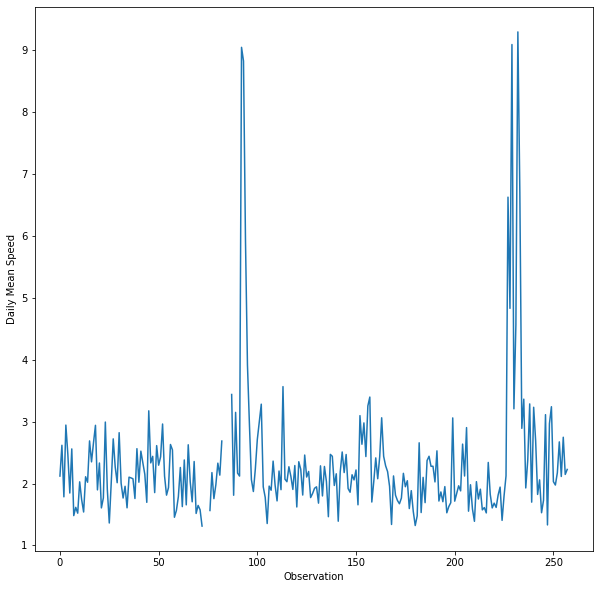

In [12]:
print(np.array(elapsed_time)/datetime.timedelta(days=1))
elapsed_days = np.array(elapsed_time)/datetime.timedelta(days=1)

next_day = 1
inds = []
daily_mean_speed = []
for (i,t) in enumerate(elapsed_days):
  if t < next_day:
    inds.append(i)
  else:
    daily_mean_speed.append(np.mean(birddata.speed_2d[inds]))
    next_day += 1
    inds = []

plt.figure(figsize=(10,10))
plt.plot(daily_mean_speed)
plt.xlabel("Observation")
plt.ylabel("Daily Mean Speed")

In [ ]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt


proj = ccrs.Mercator()

plt.figure(figsize=(10,10))
ax = plt.axes(projection=proj)
ax.set_extent((-25.0, 20.0, 52.0, 10.0))
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle = ":")

for bird_name in bird_names:
  ix = birddata.bird_name == bird_name
  x, y = birddata.longitude[ix], birddata.latitude[ix]
  ax.plot(x, y, transform=ccrs.Geodetic(), label=bird_name)

plt.legend(loc="upper left")